# Testing and running Interactive Spectral Integrand Plot

These show the spectral integrand (in the Z plane by default) as interactive functions of the $x$ and $z$ coordinate.  If no input field ($f_0$) is provided, it assumes a delta source and adds an interactive term for the source location $s$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-5, Ts=[6.5, 1, 8, 1, 6.5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, no_xs=True, wl=9e-6)

In [3]:
b = 1.25
a = 1/ b**2
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - a * x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

f0 = quadratic_piecewise

interactive(children=(FloatSlider(value=0.0, description='x', layout=Layout(width='90%'), max=11.5, min=-11.5,…

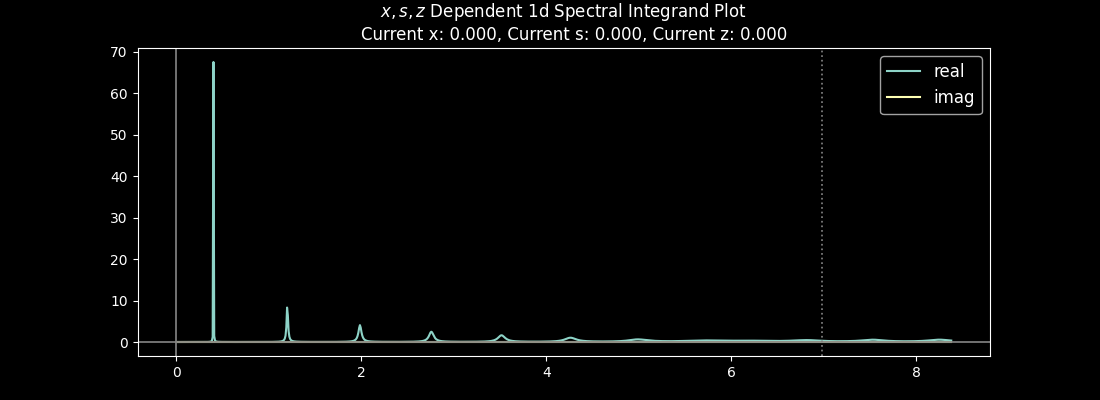

In [8]:
contour = A.real_contour(0.000001, 1.2*A.Z_evanescent.real, 1000)
# contour = A.vertical_contour(4, 2, -2, 500)
# contour = A.sdp_contour(0.000001, 6, 1500)


A.interactive_spectral_integrand_1d(contour, f0=None, Lx=-b, Rx=b, Normalizer=A.normalizer('paper'))

interactive(children=(FloatSlider(value=0.0, description='x', layout=Layout(width='90%'), max=11.5, min=-11.5,…

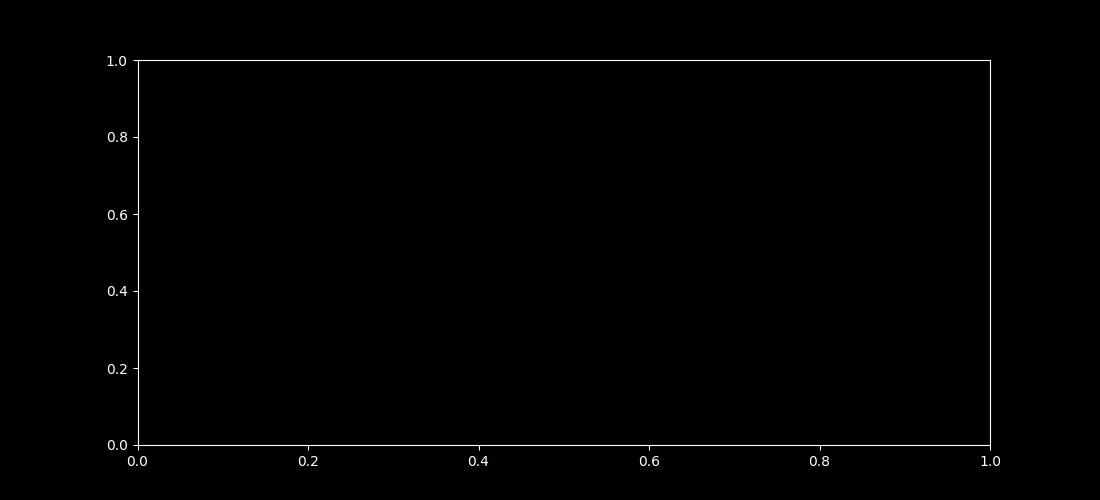

In [11]:
A.interactive_spectral_integrand_2d(5, 1.2*A.Z_evanescent.real, -.3, .3,
                                    rref=150, iref=150, levels=90,
                                    Normalizer=A.normalizer('eigvec'),
                                    # max_val=2, min_val=-2,
                                    part='real', log_abs=False, facecolor='k', grid=False, axis_linecolor='w', 
                                   )

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/pv/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_7137/836086634.py", line 1, in <module>
    A.spectral_integrand_plot(-1.5, 1.5, -.3, .3, f0=None, x=0, z=0, s=0,
  File "/home/pv/local/slab/slab.py", line 2118, in spectral_integrand_plot
TypeError: SlabExact.spectral_integrand() got an unexpected keyword argument 'p'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/pv/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/pv/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/pv/.local/lib/python3.10/site-packages/IPython/core/ultratb.p

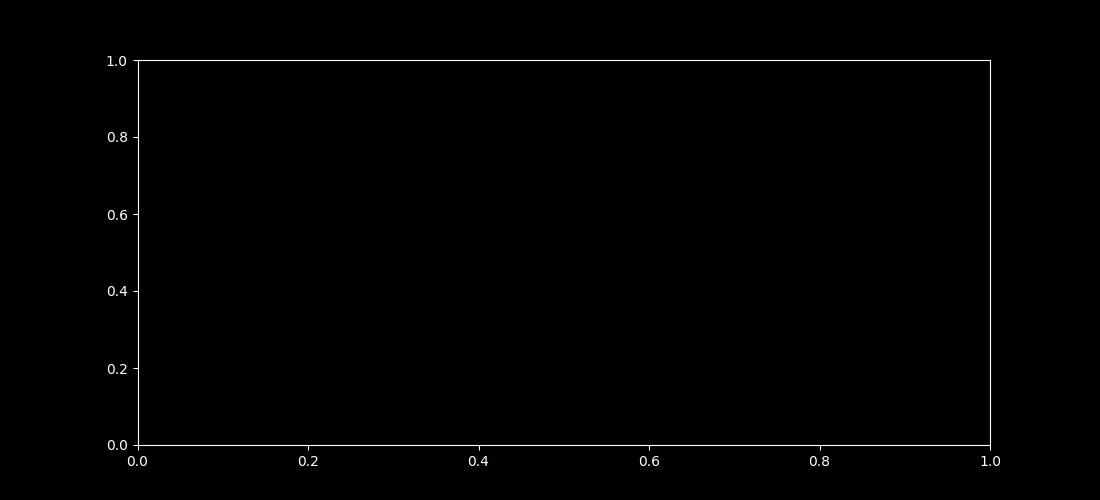

In [7]:
A.spectral_integrand_plot(-1.5, 1.5, -.3, .3, f0=None, x=0, z=0, s=0,
                          rref=150, iref=150, levels=90,
                          Normalizer=A.normalizer('paper'), vmax=2)

(<Figure size 1100x500 with 1 Axes>, <Axes: >)

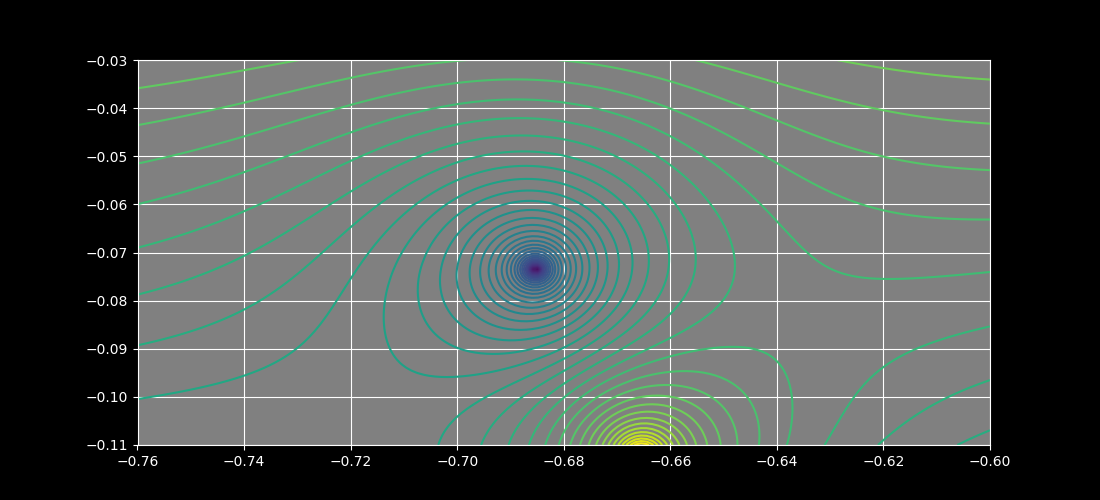

In [15]:
A.determinant_plot(-.76, -.6, -.11, -.03, rref=150, iref=150, levels=60, mode_type='radiation',
                   Normalizer=A.normalizer('paper'), sign=1, colorbar=False)

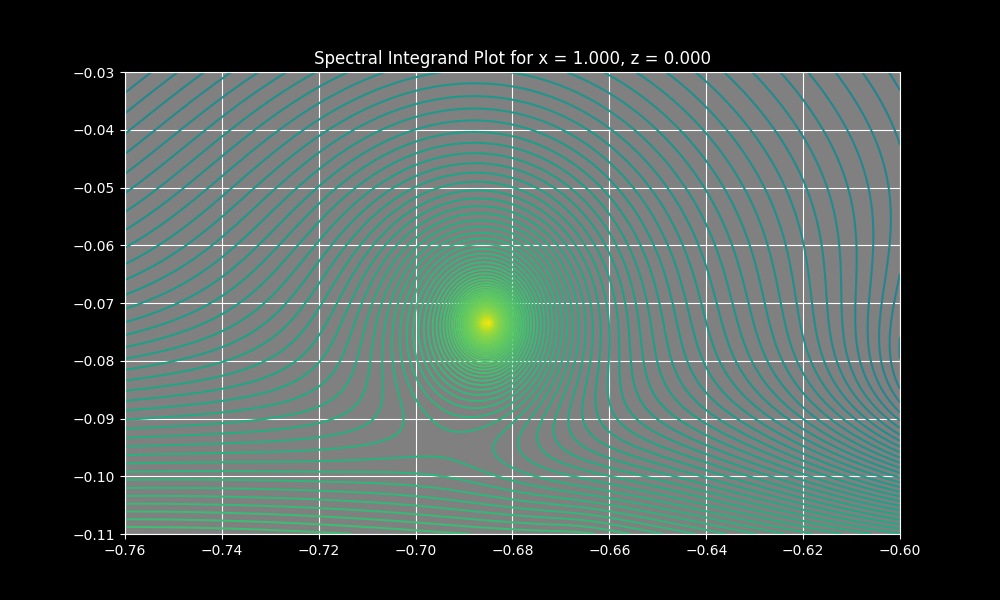

In [20]:
A.spectral_integrand_plot(-.76, -.6, -.11, -.03, f0=None, x=1, z=0, s=-7,
                          rref=150, iref=150, levels=90,
                          Normalizer=A.normalizer('paper'), vmax=2)